In [2]:
# define relevants paths and load functions and libraries

%run Bianchini2025_SC\\Analysis\\helper_functions\\functions_analysis.py
    
data_path = 'Bianchini2025_SC\\Datasets\\' # your data path
saving_path = 'Bianchini2025_SC\\Figures_output\\' # your saving figures path

C:\Users\bianchg\AppData\Local\Temp\8\ipykernel_9176\136026903.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tick_positions = np.arange(min_value, max_value+1, 54)
C:\Users\bianchg\AppData\Local\Temp\8\ipykernel_9176\136026903.py:134: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tick_positions = np.arange(min_value, max_value+1, 54)


Slope: 74.09 ± 24.79 °/mm
Offset: 30.18 ± 22.98 °
0.7058412552242694 0.0152184274027232
0.4422474473822279 1.430584336261739e-05
Slope: 73.20 ± 21.97 °/mm
Offset: 43.06 ± 20.38 °
0.7430866795785439 0.008781518464149226
0.46223775748817986 5.112091590438158e-06


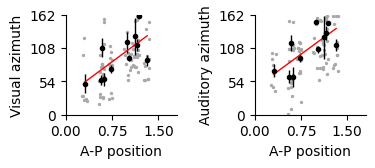

In [3]:
# Plot correlation between AP position and visual/auditory azimuth - Fig 1A

load_dir = ''.join([data_path,'neurons_datasets\\retinotopy_vis_aud_azimuth_elevation.npz'])
# Load the file
data = np.load(load_dir)

edges_slices = data['edges_slices']
mean_ML_pos = data['mean_ML_pos']
mean_AP_pos = data['mean_AP_pos']
ML_pos_all = data['ML_pos_all']
AP_pos_all = data['AP_pos_all']
vis_coord_all = data['vis_coord_all']
aud_coord_all = data['aud_coord_all']
all_recs = data['all_recs']

load_dir = ''.join([data_path,'neurons_datasets\\AP_ML_lim.npz'])
data = np.load(load_dir)
AP_lim = data['AP_lim']
ML_lim = data['ML_lim']

AP_length = np.round((AP_lim[1]-AP_lim[0])/1000,2)

dims = (1, 2)
asp = 0.5
fig, axs = plt.subplots(*dims, figsize=(3, 1), gridspec_kw={'wspace': 0.7})
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
# plot AP vs visual azimuth
ax = axs[0]

azimuths = vis_coord_all[:, 0]
groups = all_recs[:, 0]

# Find unique groups
unique_groups = np.unique(groups)
# Prepare containers
group_means = []
group_sems = []

for g in unique_groups:
    group_data = azimuths[groups == g]
    group_means.append(np.mean(group_data))
    if len(group_data) > 1:
        group_sems.append(stats.sem(group_data))
    else:
        group_sems.append(0)

# Convert to arrays if needed
group_means = np.array(group_means)
group_sems = np.array(group_sems)

mean_AP_pos_corr = (mean_AP_pos-AP_lim[0])/1000 # in mm
AP_pos_all_corr = (AP_pos_all-AP_lim[0])/1000
ax.scatter(AP_pos_all_corr, vis_coord_all[:,0], s=2, c='#A9A9A9')
ax.errorbar(mean_AP_pos_corr, group_means, yerr=group_sems, fmt='.', 
            color='k', ecolor='k', elinewidth=1, capsize=0)

# Linear fit
slope, intercept = np.polyfit(mean_AP_pos_corr, group_means, 1)
x_fit = np.linspace(min(mean_AP_pos_corr), max(mean_AP_pos_corr), 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='red', linewidth=1)

# Labels and styling
ax.set_ylabel('Visual azimuth', fontsize=10)
ax.set_xlabel('A-P position', fontsize=10)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlim([0,AP_length])
ax.set_xticks([0,1.5/2,1.5])
min_value = edges_slices[0]
max_value =edges_slices[1]
ax.set_ylim([min_value,  max_value])
tick_positions = np.arange(min_value, max_value+1, 54)
ax.set_yticks(tick_positions)

# Your data
x = mean_AP_pos_corr  # in mm
y = group_means  # in degrees

# Run linear regression
result = stats.linregress(x, y)

# Extract parameters
slope = result.slope
intercept = result.intercept
slope_err = result.stderr
intercept_err = result.intercept_stderr

print(f"Slope: {slope:.2f} ± {slope_err:.2f} °/mm")
print(f"Offset: {intercept:.2f} ± {intercept_err:.2f} °")
CC_A, pA = stats.pearsonr(mean_AP_pos_corr, group_means)
CC_A2, pA2 = stats.pearsonr(AP_pos_all_corr[:,0], vis_coord_all[:,0])
print(CC_A, pA)
print(CC_A2, pA2 )

# plot auditory 
ax = axs[1]
azimuths = aud_coord_all[:, 0]
groups = all_recs[:, 0]

# Find unique groups
unique_groups = np.unique(groups)
# Prepare containers
group_means = []
group_sems = []

for g in unique_groups:
    group_data = azimuths[groups == g]
    group_means.append(np.mean(group_data))
    if len(group_data) > 1:
        group_sems.append(stats.sem(group_data))
    else:
        group_sems.append(0)

# Convert to arrays if needed
group_means = np.array(group_means)
group_sems = np.array(group_sems)
ax.scatter(AP_pos_all_corr, aud_coord_all[:,0], s=2, c='#A9A9A9')
ax.errorbar(mean_AP_pos_corr, group_means, yerr=group_sems, fmt='.', 
            color='k', ecolor='k', elinewidth=1, capsize=0)

# Linear fit
slope, intercept = np.polyfit(mean_AP_pos_corr, group_means, 1)
x_fit = np.linspace(min(mean_AP_pos_corr), max(mean_AP_pos_corr), 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='red', linewidth=1)

# Labels and styling
ax.set_ylabel('Auditory azimuth', fontsize=10)
ax.set_xlabel('A-P position', fontsize=10)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylim([min_value,  max_value])
tick_positions = np.arange(min_value, max_value+1, 54)
ax.set_yticks(tick_positions)
ax.set_xlim([0,AP_length])
ax.set_xticks([0,1.5/2,1.5])
# Your data
x = mean_AP_pos_corr  # in mm
y = group_means # in degrees

# Run linear regression
result = stats.linregress(x, y)

# Extract parameters
slope = result.slope
intercept = result.intercept
slope_err = result.stderr
intercept_err = result.intercept_stderr

print(f"Slope: {slope:.2f} ± {slope_err:.2f} °/mm")
print(f"Offset: {intercept:.2f} ± {intercept_err:.2f} °")

CC_A, pA = stats.pearsonr(mean_AP_pos_corr, group_means)
CC_A2, pA2 = stats.pearsonr(AP_pos_all_corr[:,0], aud_coord_all[:,0])
print(CC_A, pA)
print(CC_A2, pA2 )
# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1A.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

Slope: 19.94 ± 13.24 °/mm
Offset: -16.12 ± 14.63 °
0.44860858383344937 0.16636738365686468
0.29103150694526253 0.005658583820173185
Slope: -13.03 ± 20.89 °/mm
Offset: 12.56 ± 23.08 °
-0.2035280129237608 0.5483434911570894
-0.013899163387580167 0.8971384528780834


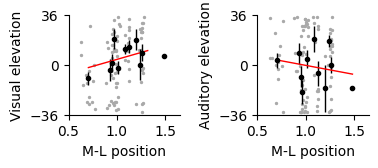

In [4]:
# Plot correlation between ML position and visual/auditory elevation - Fig 1B

ML_length = np.round((ML_lim[1]-ML_lim[0])/1000,2)

dims = (1, 2)
asp = 0.5
fig, axs = plt.subplots(*dims, figsize=(3, 1), gridspec_kw={'wspace': 0.7})
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
# plot AP vs visual azimuth
ax = axs[0]

azimuths = vis_coord_all[:, 1]
groups = all_recs[:, 0]

# Find unique groups
unique_groups = np.unique(groups)
# Prepare containers
group_means = []
group_sems = []

for g in unique_groups:
    group_data = azimuths[groups == g]
    group_means.append(np.mean(group_data))
    if len(group_data) > 1:
        group_sems.append(stats.sem(group_data))
    else:
        group_sems.append(0)

# Convert to arrays if needed
group_means = np.array(group_means)
group_sems = np.array(group_sems)

actual_lengthML = ML_lim[1] - ML_lim[0]
mean_ML_pos_corr = mean_ML_pos - ML_lim[0]
max_val = actual_lengthML
min_val = 0 
mean_ML_pos_corr = (np.array([max_val - val + min_val for val in mean_ML_pos_corr]))/1000
ML_pos_all_corr = ML_pos_all - ML_lim[0]
ML_pos_all_corr = (np.array([max_val - val + min_val for val in ML_pos_all_corr]))/1000

ax.scatter(ML_pos_all_corr, vis_coord_all[:,1], s=2, c='#A9A9A9')
ax.errorbar(mean_ML_pos_corr, group_means, yerr=group_sems, fmt='.', 
            color='k', ecolor='k', elinewidth=1, capsize=0)

# Linear fit
slope, intercept = np.polyfit(mean_ML_pos_corr, group_means, 1)
x_fit = np.linspace(min(mean_ML_pos_corr), max(mean_AP_pos_corr), 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='red', linewidth=1)

# Labels and styling
ax.set_ylabel('Visual elevation', fontsize=10)
ax.set_xlabel('M-L position', fontsize=10)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlim([0.5,1.65])#ax.set_xlim([0,ML_length])
#ax.set_xticks([0,1,2])
ax.set_ylim([-36,  36])
ax.set_yticks([-36,0,36])

# Your data
x = mean_ML_pos_corr  # in mm
y = group_means  # in degrees

# Run linear regression
result = stats.linregress(x, y)

# Extract parameters
slope = result.slope
intercept = result.intercept
slope_err = result.stderr
intercept_err = result.intercept_stderr

print(f"Slope: {slope:.2f} ± {slope_err:.2f} °/mm")
print(f"Offset: {intercept:.2f} ± {intercept_err:.2f} °")

CC_A, pA = stats.pearsonr(mean_ML_pos_corr, group_means)
CC_A2, pA2 = stats.pearsonr(ML_pos_all_corr[:,0], vis_coord_all[:,1])
print(CC_A, pA)
print(CC_A2, pA2)

# plot auditory 
ax = axs[1]
azimuths = aud_coord_all[:, 1]
groups = all_recs[:, 0]

# Find unique groups
unique_groups = np.unique(groups)
# Prepare containers
group_means = []
group_sems = []

for g in unique_groups:
    group_data = azimuths[groups == g]
    group_means.append(np.mean(group_data))
    if len(group_data) > 1:
        group_sems.append(stats.sem(group_data))
    else:
        group_sems.append(0)

# Convert to arrays if needed
group_means = np.array(group_means)
group_sems = np.array(group_sems)
ax.scatter(ML_pos_all_corr, aud_coord_all[:,1], s=2, c='#A9A9A9')
ax.errorbar(mean_ML_pos_corr, group_means, yerr=group_sems, fmt='.', 
            color='k', ecolor='k', elinewidth=1, capsize=0)

# Linear fit
slope, intercept = np.polyfit(mean_ML_pos_corr, group_means, 1)
x_fit = np.linspace(min(mean_ML_pos_corr), max(mean_ML_pos_corr), 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='red', linewidth=1)

# Labels and styling
ax.set_ylabel('Auditory elevation', fontsize=10)
ax.set_xlabel('M-L position', fontsize=10)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xlim([0.5,1.65])#ML_length])
#ax.set_xticks([0,1,2])
ax.set_ylim([-36,  36])
ax.set_yticks([-36,0,36])
# Your data
x = mean_ML_pos_corr  # in mm
y = group_means # in degrees

# Run linear regression
result = stats.linregress(x, y)

# Extract parameters
slope = result.slope
intercept = result.intercept
slope_err = result.stderr
intercept_err = result.intercept_stderr

print(f"Slope: {slope:.2f} ± {slope_err:.2f} °/mm")
print(f"Offset: {intercept:.2f} ± {intercept_err:.2f} °")

CC_A, pA = stats.pearsonr(mean_ML_pos_corr, group_means)
CC_A2, pA2 = stats.pearsonr(ML_pos_all_corr[:,0], aud_coord_all[:,1])
print(CC_A, pA)
print(CC_A2, pA2)


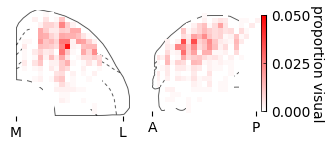

In [5]:
# plot density map of visual, auditory and multisensory neruons across the different regions of the SC

# load the atlas SC images
dir1=file=''.join([data_path,'SC_AP_modified.tif'])
im_AP = imageio.imread(dir1)
img = Image.open(dir1)

dir2=file=''.join([data_path,'SC_ML_modified.tif'])
im_ML = imageio.imread(dir2)

# load the data
load_dir = ''.join([data_path,'neurons_datasets\\prop_subpopulation_subregions.npz'])
data = np.load(load_dir)
vis_ML = data['vis_ML']
vis_AP = data['vis_AP']
aud_ML = data['aud_ML']
aud_AP = data['aud_AP']
multi_ML = data['multi_ML']
multi_AP = data['multi_AP']
n_bins_tot=20

# get the limits
all_values = np.concatenate([vis_ML,vis_ML])
vmin = 0
vmax = np.round(np.nanmax(all_values),2)
cmap = plt.cm.get_cmap('bwr')
cmap = LinearSegmentedColormap.from_list("white_red", ["white", "red"])

dims = (1,2)
fig, axs = plt.subplots(*dims, figsize=(2.5,2), 
                        subplot_kw={'aspect': 1})
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

# plot the ML SC
this_ax = axs[0]
this_ax.imshow(im_ML)
# Remove the axis line
this_ax.spines.left.set_visible(False)
this_ax.spines.bottom.set_visible(False)
this_ax.spines.right.set_visible(False)
this_ax.spines.top.set_visible(False)
this_ax.set_aspect('equal')
this_ax.set_xticks([0, len(im_ML)])
this_ax.set_xticklabels(['M', 'L'],fontsize=10)
this_ax.set_yticks([])

# overlay the binning
this_ax2 = fig.add_subplot(1,2,1)
im = this_ax2.imshow(vis_ML,aspect="equal",cmap=cmap,vmin=vmin, vmax=vmax)
this_ax2.patch.set_alpha(0.5)
this_ax2.set_position(this_ax.get_position())
this_ax2.axis('off')
this_ax2.set_aspect('equal')
this_ax2.set_xlim([0, n_bins_tot])
this_ax2.set_ylim([n_bins_tot, 0])

# plot the AP SC
this_ax = axs[1]
this_ax.imshow(im_AP)
# Remove the axis line
this_ax.spines.left.set_visible(False)
this_ax.spines.bottom.set_visible(False)
this_ax.spines.right.set_visible(False)
this_ax.spines.top.set_visible(False)
this_ax.set_xticks([0, len(im_ML)])
this_ax.set_xticklabels(['A', 'P'],fontsize=10)
this_ax.set_yticks([])
this_ax.set_aspect('equal')

# overlay the binning
this_ax2 = fig.add_subplot(1,2,2)
im = this_ax2.imshow(vis_AP,aspect="equal",cmap=cmap,vmin=vmin, vmax=vmax)
this_ax2.patch.set_alpha(0.5)
this_ax2.set_position(this_ax.get_position())
this_ax2.set_aspect('equal')
this_ax2.set_xlim([0, n_bins_tot])
this_ax2.set_ylim([n_bins_tot, 0])
this_ax2.axis('off')

divider = make_axes_locatable(this_ax)
norm = LogNorm(vmin=vmin, vmax=vmax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax , norm=norm,ticks=[0, vmax/2,vmax])
cbar.set_label('proportion visual',rotation=-90,labelpad=10, fontsize=10)
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.ax.tick_params(width=0.5, length=2, direction='in', which='both', labelsize=10)
cbar.outline.set_linewidth(0.5)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1C.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

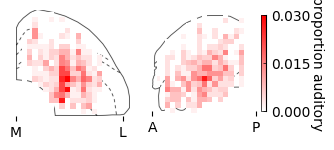

In [6]:
# plot density map of visual, auditory and multisensory neruons across the different regions of the SC

# get the limits
all_values = np.concatenate([aud_ML,aud_ML])
vmin = 0
vmax = np.round(np.nanmax(all_values),2)
cmap = plt.cm.get_cmap('bwr')
cmap = LinearSegmentedColormap.from_list("white_red", ["white", "red"])

dims = (1,2)
fig, axs = plt.subplots(*dims, figsize=(2.5,2), 
                        subplot_kw={'aspect': 1})
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

# plot the ML SC
this_ax = axs[0]
this_ax.imshow(im_ML)
# Remove the axis line
this_ax.spines.left.set_visible(False)
this_ax.spines.bottom.set_visible(False)
this_ax.spines.right.set_visible(False)
this_ax.spines.top.set_visible(False)
this_ax.set_aspect('equal')
this_ax.set_xticks([0, len(im_ML)])
this_ax.set_xticklabels(['M', 'L'],fontsize=10)
this_ax.set_yticks([])

# overlay the binning
this_ax2 = fig.add_subplot(1,2,1)
im = this_ax2.imshow(aud_ML,aspect="equal",cmap=cmap,vmin=vmin, vmax=vmax)
this_ax2.patch.set_alpha(0.5)
this_ax2.set_position(this_ax.get_position())
this_ax2.axis('off')
this_ax2.set_aspect('equal')
this_ax2.set_xlim([0, n_bins_tot])
this_ax2.set_ylim([n_bins_tot, 0])

# plot the AP SC
this_ax = axs[1]
this_ax.imshow(im_AP)
# Remove the axis line
this_ax.spines.left.set_visible(False)
this_ax.spines.bottom.set_visible(False)
this_ax.spines.right.set_visible(False)
this_ax.spines.top.set_visible(False)
this_ax.set_xticks([0, len(im_ML)])
this_ax.set_xticklabels(['A', 'P'],fontsize=10)
this_ax.set_yticks([])
this_ax.set_aspect('equal')

# overlay the binning
this_ax2 = fig.add_subplot(1,2,2)
im = this_ax2.imshow(aud_AP,aspect="equal",cmap=cmap,vmin=vmin, vmax=vmax)
this_ax2.patch.set_alpha(0.5)
this_ax2.set_position(this_ax.get_position())
this_ax2.set_aspect('equal')
this_ax2.set_xlim([0, n_bins_tot])
this_ax2.set_ylim([n_bins_tot, 0])
this_ax2.axis('off')

divider = make_axes_locatable(this_ax)
norm = LogNorm(vmin=vmin, vmax=vmax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax , norm=norm,ticks=[0, vmax/2,vmax])
cbar.set_label('proportion auditory',rotation=-90,labelpad=10, fontsize=10)
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.ax.tick_params(width=0.5, length=2, direction='in', which='both', labelsize=10)
cbar.outline.set_linewidth(0.5)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1D.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

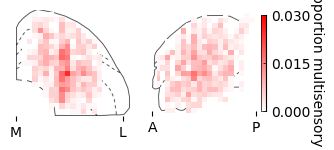

In [7]:
# plot density map of visual, auditory and multisensory neruons across the different regions of the SC

# get the limits
all_values = np.concatenate([multi_ML,multi_ML])
vmin = 0
vmax = np.round(np.nanmax(all_values),2)
cmap = plt.cm.get_cmap('bwr')
cmap = LinearSegmentedColormap.from_list("white_red", ["white", "red"])

dims = (1,2)
fig, axs = plt.subplots(*dims, figsize=(2.5,2), 
                        subplot_kw={'aspect': 1})
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)

# plot the ML SC
this_ax = axs[0]
this_ax.imshow(im_ML)
# Remove the axis line
this_ax.spines.left.set_visible(False)
this_ax.spines.bottom.set_visible(False)
this_ax.spines.right.set_visible(False)
this_ax.spines.top.set_visible(False)
this_ax.set_aspect('equal')
this_ax.set_xticks([0, len(im_ML)])
this_ax.set_xticklabels(['M', 'L'],fontsize=10)
this_ax.set_yticks([])

# overlay the binning
this_ax2 = fig.add_subplot(1,2,1)
im = this_ax2.imshow(multi_ML,aspect="equal",cmap=cmap,vmin=vmin, vmax=vmax)
this_ax2.patch.set_alpha(0.5)
this_ax2.set_position(this_ax.get_position())
this_ax2.axis('off')
this_ax2.set_aspect('equal')
this_ax2.set_xlim([0, n_bins_tot])
this_ax2.set_ylim([n_bins_tot, 0])

# plot the AP SC
this_ax = axs[1]
this_ax.imshow(im_AP)
# Remove the axis line
this_ax.spines.left.set_visible(False)
this_ax.spines.bottom.set_visible(False)
this_ax.spines.right.set_visible(False)
this_ax.spines.top.set_visible(False)
this_ax.set_xticks([0, len(im_ML)])
this_ax.set_xticklabels(['A', 'P'],fontsize=10)
this_ax.set_yticks([])
this_ax.set_aspect('equal')

# overlay the binning
this_ax2 = fig.add_subplot(1,2,2)
im = this_ax2.imshow(multi_AP,aspect="equal",cmap=cmap,vmin=vmin, vmax=vmax)
this_ax2.patch.set_alpha(0.5)
this_ax2.set_position(this_ax.get_position())
this_ax2.set_aspect('equal')
this_ax2.set_xlim([0, n_bins_tot])
this_ax2.set_ylim([n_bins_tot, 0])
this_ax2.axis('off')

divider = make_axes_locatable(this_ax)
norm = LogNorm(vmin=vmin, vmax=vmax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im,cax=cax , norm=norm,ticks=[0, vmax/2,vmax])
cbar.set_label('proportion multisensory',rotation=-90,labelpad=10, fontsize=10)
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
cbar.ax.spines['right'].set_visible(True)
cbar.ax.tick_params(width=0.5, length=2, direction='in', which='both', labelsize=10)
cbar.outline.set_linewidth(0.5)

# define a saving directory and save it 
dir = ''.join([saving_path,'Supplementary_Figure1E.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)